# Provided datasets

aeon provides several baked in datasets in the aeon.datasets.data directory along
with one off loading functions. These data are useful for illustrative examples.

We also provide tools for loading data from repositories and from disk in specific
formats. See notebooks <other>. This notebook describes the baked in data shipped
with aeon.

# Forecasting

Forecasting data are stored in csv files with a header for column names. Seven
standard example datasets are shipped by default: Airline, Longley, Lynx,
PBS_dataset, ShampooSales, solar and Uschange. These are stored in csv format
in time, value format, including a header. For example,

    Date,Passengers
    1949-01,112
    1949-02,118

    "Obs","TOTEMP","GNPDEFL","GNP","UNEMP","ARMED","POP","YEAR"
    1,60323,83,234289,2356,1590,107608,1947
    2,61122,88.5,259426,2325,1456,108632,1948
    3,60171,88.2,258054,3682,1616,109773,1949

    ,Quarter,Consumption,Income,Production,Savings,Unemployment
    0,1970 Q1,0.615986218,0.9722610429999999,-2.4527003119999997,4.810311502,0.9
    1,1970 Q2,0.46037569,1.169084717,-0.551525087,7.287992337,0.5
    2,1970 Q3,0.876791423,1.55327055,-0.35870786200000004,7.289013063,0.5

The problem specific loading functions return the series as either a `pd.Series` or a
 `pd.DataFrame`. There are currently six forecasting problems shipped.

### Airline

The classic Box & Jenkins airline data. Monthly totals of international
    airline passengers, 1949 to 1960. This data shows an increasing trend,
    non-constant (increasing) variance and periodic, seasonal patterns. The


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

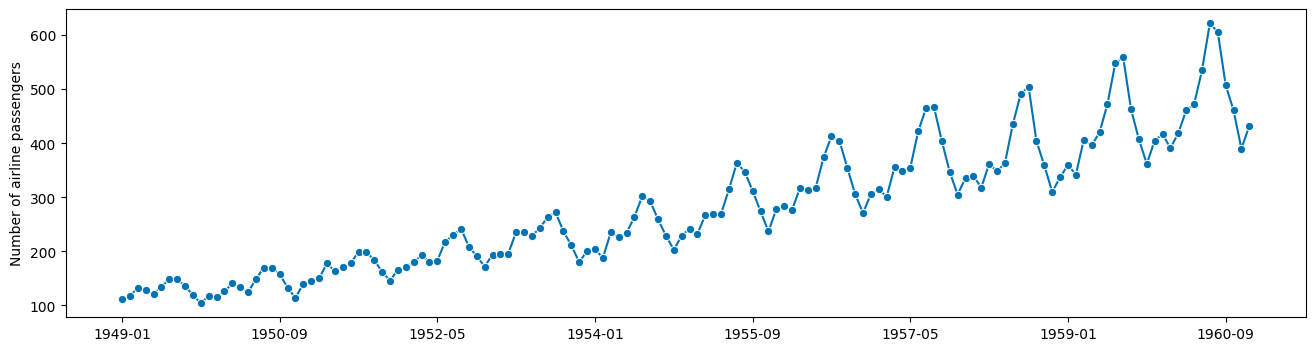

In [34]:
import warnings

from aeon.datasets import load_airline
from aeon.utils.plotting import plot_series

warnings.filterwarnings("ignore")

airline = load_airline()
plot_series(airline)

### Longley
This mulitvariate time series dataset contains various US macroeconomic
    variables from 1947 to 1962 that are known to be highly collinear. This loader
    returns a tuple of a pd.Series to be forecast (default TOTEMP: total
    employment) and a pd.DataFrame of other variables that may be useful in  the forecast
    GNPDEFL - Gross national product deflator
    GNP - Gross national product
    UNEMP - Number of unemployed
    ARMED - Size of armed forces
    POP - Population


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='TOTEMP'>)

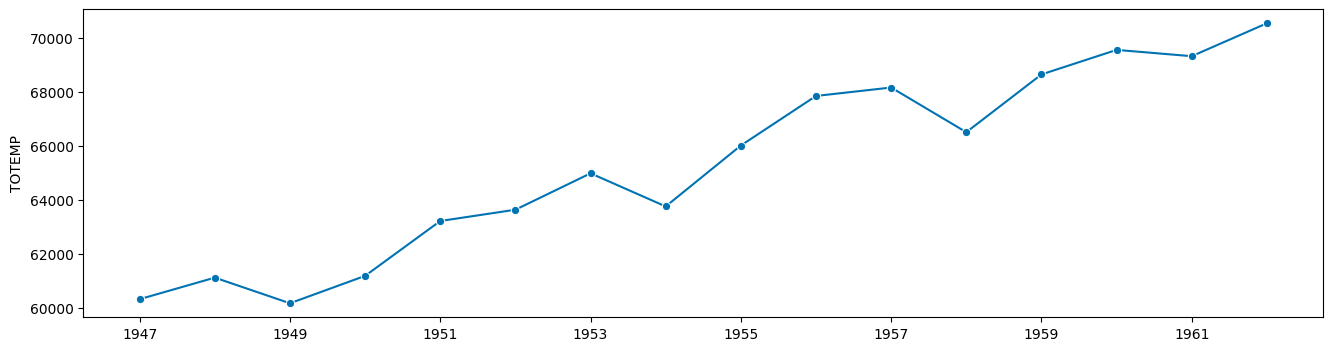

In [35]:
from aeon.datasets import load_longley

employment, longley = load_longley()
plot_series(employment)

### Lynx

The annual numbers of lynx trappings for 1821–1934 in Canada. This
    time-series records the number of skins of predators (lynx) that were collected
    over several years by the Hudson's Bay Company. Returns a pd.Series

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of Lynx trappings'>)

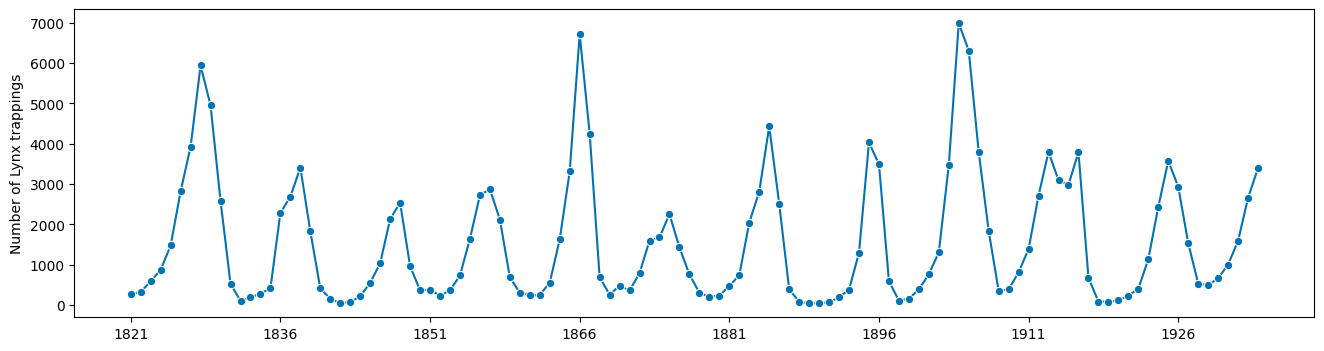

In [36]:
from aeon.datasets import load_lynx

lynx = load_lynx()
plot_series(lynx)

### PBS_dataset

The Pharmaceutical Benefits Scheme (PBS) is the Australian government drugs
    subsidy scheme. Data comprises of the numbers of scripts sold each month for immune sera
    and immunoglobulin products in Australia. The load function returns a pd.Series.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of scripts'>)

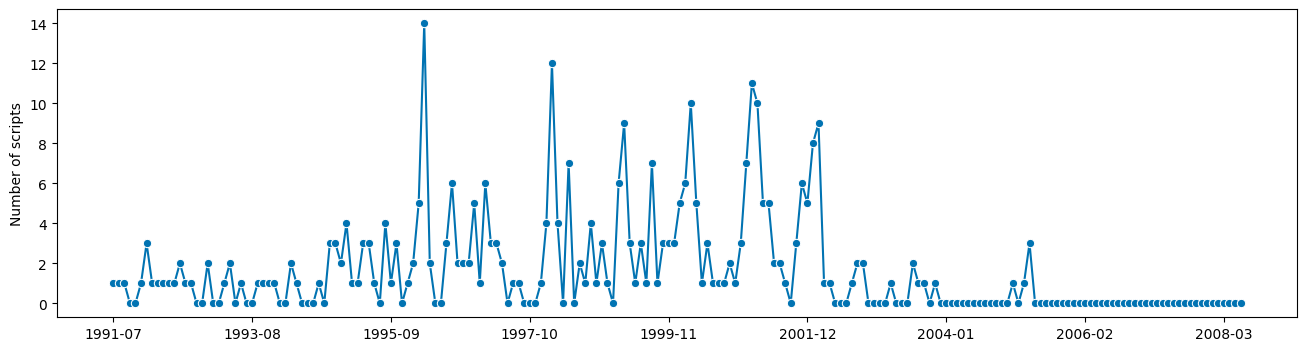

In [37]:
from aeon.datasets import load_PBS_dataset

pbs = load_PBS_dataset()
plot_series(pbs)

### ShampooSales

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count. It returns a single pd.Series.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of scripts'>)

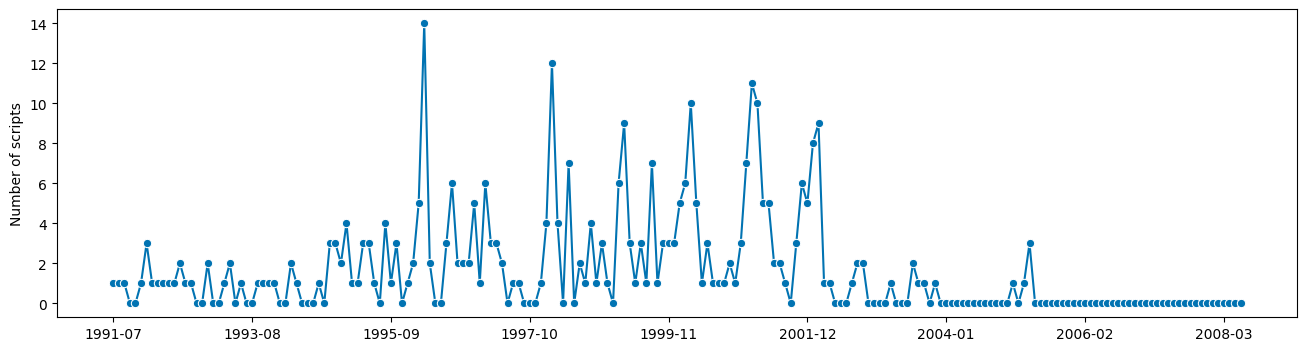

In [38]:
from aeon.datasets import load_shampoo_sales

shampoo = load_shampoo_sales()
plot_series(pbs)

### Uschange
Data describes the percentage changes in quarterly personal consumption expenditure,
personal disposable income, production, savings and the unemployment rate for the US,
 1960 to 2016. uarter,Consumption,Income,Production,Savings,Unemployment. Return a a
 tuple of pd.Series (consumption) and a pd.DataFrame (the other variables).

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Consumption'>)

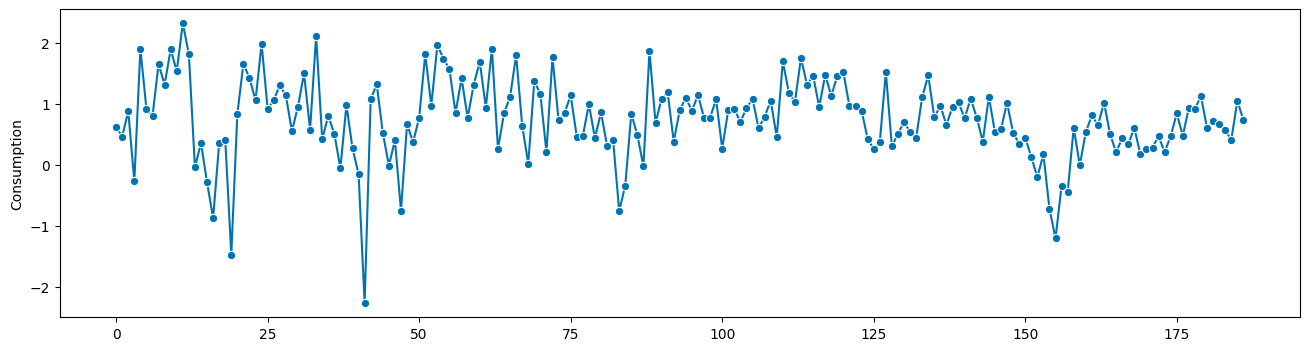

In [39]:
from aeon.datasets import load_uschange

consumption, the_rest = load_uschange()
plot_series(consumption)

# Machine Learning

We provide several data sets used in classification, regression and clustering from
the time series machine learning archives (including the UCR archive). These data are
 all available from (timeseriesclassification.com)[https://timeseriesclassification
 .com/] which contains the UCR univariate tsc archive and the tsml multivariate
 archive. If you have questions or wish to donate data, please do so here
 (https://github.com/time-series-machine-learning/tsml-repo)

Our example data sets are stored as text files in .ts file (explained here)[link]. We
 have

Univariate, equal length:  ArrowHead, GunPoint, ItalyPowerDemand
Multivariate, equal length: BasicMotions
Univariate, unequal length:  PLAID
Multivariate, unequal length: JapaneseVowels
Each data comes with a predefined train test split. You can define whether to load a
split or a combination of the two.


### ArrowHead

the [ArrowHead dataset](https://timeseriesclassification.com/description.php?Dataset=ArrowHead) consists of outlines of the images of
arrow heads. The classification of projectile points is an important topic in
anthropology. The classes are based on shape distinctions such as the presence and location of a notch in the arrow. The three classes are called "Avonlea", "Clovis" and "Mix".

<img src="../img/arrow-heads.png" width="600" alt="arrow heads">


ArrowHead series of type <class 'numpy.ndarray'> and shape (36, 1, 251)


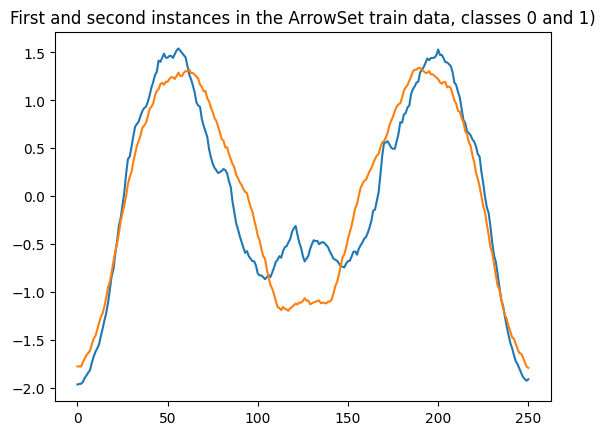

In [40]:
import warnings

import matplotlib.pyplot as plt

from aeon.datasets import load_arrow_head

warnings.filterwarnings("ignore")
arrow, arrow_labels = load_arrow_head(split="train")
print(f"ArrowHead series of type {type(arrow)} and shape {arrow.shape}")
plt.title(
    f"First and second instances in the ArrowSet train data, classes {arrow_labels[0]} "
    f"and "
    f"{arrow_labels[1]})"
)
plt.plot(arrow[0][0])
plt.plot(arrow[1][0])

### GunPoint

This dataset involves one female actor and one male actor making a motion with their
hand. The two classes are: Gun-Draw and Point: For Gun-Draw the actors have their
hands by their sides. They draw a replicate gun from a hip-mounted holster, point it
at a target for approximately one second, then return the gun to the holster, and
their hands to their sides. For Point the actors have their gun by their sides. They
point with their index fingers to a target for approximately one second, and then
return their hands to their sides. For both classes, we tracked the centroid of the
actor's right hands in both X- and Y-axes, which appear to be highly correlated. The
data in the archive is just the X-axis. Class 1 is "gun" and class 2 is "no gun
(pointing)" [see also](http://timeseriesclassification.com/description.php?Dataset=GunPoint)

For univariate data, we can choose to load it into 2D numpy rather than 3D (see
[link] for a discussion of this)

ArrowHead series of type <class 'numpy.ndarray'> and shape (36, 1, 251)


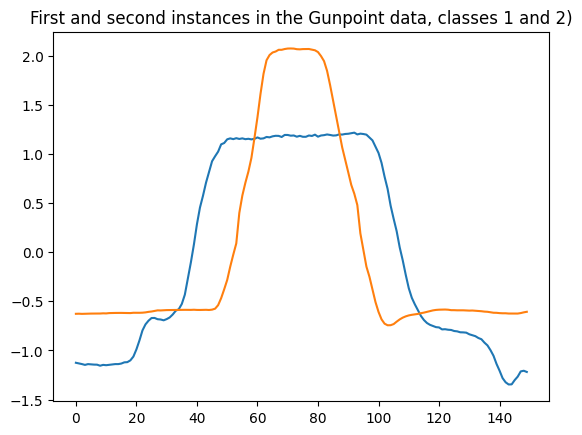

In [41]:
from aeon.datasets import load_gunpoint

gun, gun_labels = load_gunpoint(split="test", return_type="numpy2D")
print(f"ArrowHead series of type {type(arrow)} and shape {arrow.shape}")
plt.title(
    f"First and second instances in the Gunpoint data, classes {gun_labels[0]} and "
    f"{gun_labels[1]})"
)
plt.plot(gun[0])
plt.plot(gun[1])

### ItalyPowerDemand

The data was derived from twelve monthly electrical power demand time series from
Italy. The classification task is to distinguish days from Oct to March (inclusive)
from April to September. It has a very small default train set size compared to the
test set.

ItalyPowerDemand train shape (67, 24) test shape = (1029, 24)


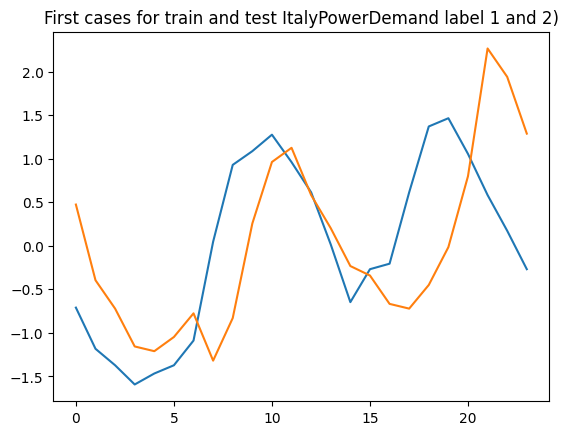

In [42]:
from aeon.datasets import load_italy_power_demand

italy, italy_labels = load_italy_power_demand(split="train", return_type="numpy2D")
italy_test, italy_test_labels = load_italy_power_demand(
    split="test", return_type="numpy2D"
)
print(f"ItalyPowerDemand train shape {italy.shape} test shape = {italy_test.shape}")
plt.title(
    f"First cases for train and test ItalyPowerDemand label {italy_labels[0]} and "
    f"{italy_test_labels[0]})"
)
plt.plot(italy[0])
plt.plot(italy_test[0])

### BasicMotions
BasicMotions is a human activity recognition, multivariate, equal length dataset. The
 data was generated as part of a student project where four students performed four
 activities whilst wearing a smart watch. The watch collects 3D accelerometer and a
 3D gyroscope. The data order is accelerometer x, y, z then gyroscope x, y, z. There
 are classes: walking, resting, running and badminton. Participants were required to
 record motion a total of five times, and the data is sampled once every tenth of a
 second, for a ten second period. [see also](http://timeseriesclassification
 .com/description.php?Dataset=BasicMotions). If we do not give a `split` argument to
 loaders, it combines the test and train files together.

Motions type <class 'numpy.ndarray'> of shape (80, 6, 100)


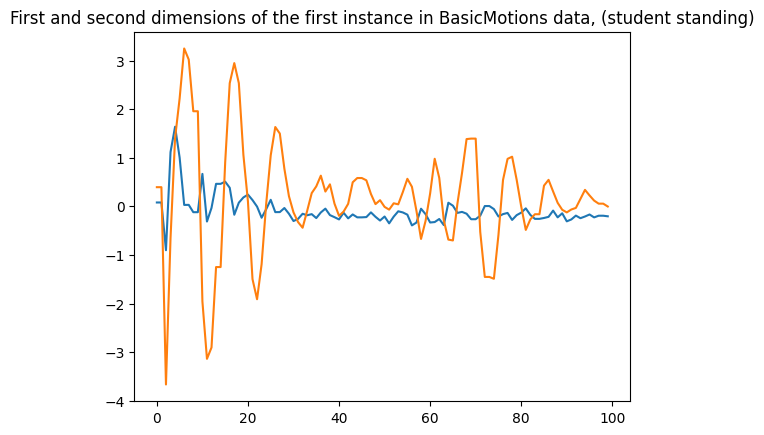

In [43]:
from aeon.datasets import load_basic_motions

motions, motions_labels = load_basic_motions()
print(f"Motions type {type(motions)} of shape {motions.shape}")
plt.title(
    f"First and second dimensions of the first instance in BasicMotions data, "
    f"(student {motions_labels[0]})"
)
plt.plot(motions[0][0])
plt.plot(motions[0][1])

### PLAID

PLAID stands for the Plug Load Appliance Identification Dataset. The data includes
current and voltage measurements sampled at 30 kHz from 11 different appliance types present in more than 56 households in Pittsburgh, Pennsylvania, USA. Data collection took place during the summer of 2013. Each appliance type is represented by dozens of different instances of varying makes/models. For each appliance, three to six measurements were collected for each state transition. These measurements were then post-processed to extract a few-second-long window containing both the steady-state operation and the startup transient )when available). The classes correspond to 11 different appliance types: air conditioner, compact flourescent lamp, fridge, hairdryer, laptop, microwave, washing machine, bulb, vacuum, fan, heater.
 (see also)[https://timeseriesclassification.com/description.php?Dataset=PLAID]

The time series are not all the same length. We store unequal length series in a list
 of 2D numpy arrays.

PLAID type <class 'list'> with 1074 cases, first shape (1, 500), last shape (1, 1000)


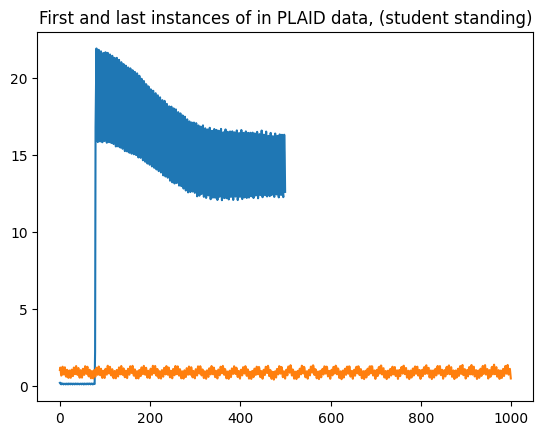

In [44]:
from aeon.datasets import load_plaid

plaid, plaid_labels = load_plaid()
print(
    f"PLAID type {type(plaid)} with {len(plaid)} cases, "
    f"first shape {plaid[0].shape}, last shape {plaid[-1].shape}"
)
plt.title(
    f"First and last instances of in PLAID data, " f"(student {motions_labels[0]})"
)
plt.plot(plaid[0][0])
plt.plot(plaid[-1][0])

### JapaneseVowels

This is A UCI Archive dataset. 9 Japanese-male speakers were recorded saying the vowels 'a' and 'e'. A '12-degree linear prediction analysis' is applied to the raw recordings to obtain time-series with 12 dimensions, a originally a length between 7 and 29. In this dataset, instances have been padded to the longest length, 29. The classification task is to predict the speaker. Therefore, each instance is a transformed utterance, 12*29 values with a single class label attached, [1...9].

It is multivariate and unequal length


JapaneseVowels type <class 'list'> with 640 cases, first shape (12, 20), last shape (12, 11)


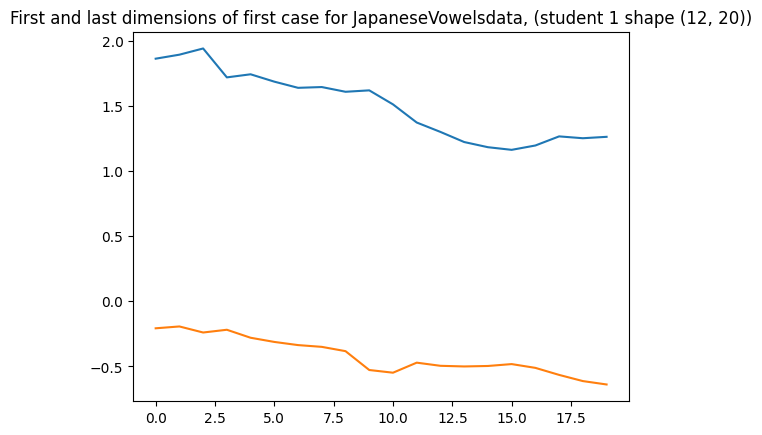

In [45]:
from aeon.datasets import load_japanese_vowels

j, j_labels = load_japanese_vowels()
print(
    f"JapaneseVowels type {type(j)} with {len(j)} cases, "
    f"first shape {j[0].shape}, last shape {j[-1].shape}"
)
plt.title(
    f"First and last dimensions of first case for "
    f"JapaneseVowelsdata (student {j_labels[0]} "
    f"shape {j[0].shape})"
)
plt.plot(j[0][0])
plt.plot(j[0][1])